In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

import utils

In [2]:
RANDOM_SEED = 42

In [3]:
(x_train, y_train), (x_val, y_val), (x_test, y_test) = utils.load_housing_data()
print(f"x_train.shape = {x_train.shape}, y_train.shape = {y_train.shape}")
print(f"x_val.shape = {x_val.shape}, y_val.shape = {y_val.shape}")
print(f"x_test.shape = {x_test.shape}, y_test.shape = {y_test.shape}")

x_train.shape = (11610, 8), y_train.shape = (11610,)
x_val.shape = (3870, 8), y_val.shape = (3870,)
x_test.shape = (5160, 8), y_test.shape = (5160,)


## Multiple path

In [4]:
utils.reset_session(RANDOM_SEED)

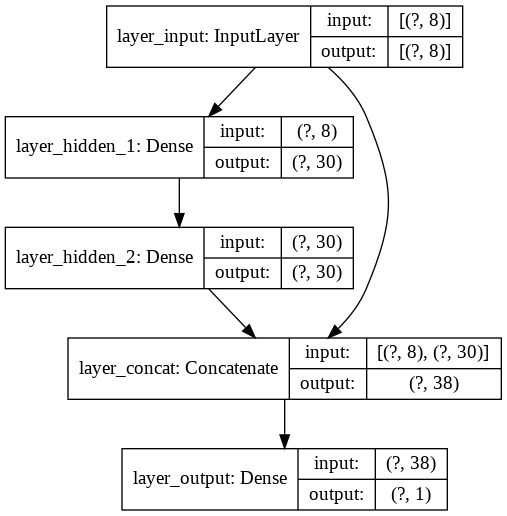

In [5]:
layer_input = keras.layers.Input(shape=x_train.shape[1:], name="layer_input")
layer_hidden_1 = keras.layers.Dense(30, activation='relu', name="layer_hidden_1")(layer_input)
layer_hidden_2 = keras.layers.Dense(30, activation='relu', name="layer_hidden_2")(layer_hidden_1)
layer_concat = keras.layers.concatenate([layer_input, layer_hidden_2], name="layer_concat")
layer_output = keras.layers.Dense(1, name="layer_output")(layer_concat)

model = keras.models.Model(inputs=[layer_input], outputs=[layer_output])

keras.utils.plot_model(model, show_shapes=True)

In [6]:
model.compile(optimizer=keras.optimizers.SGD(lr=1e-3), loss='mse')

history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.2611 - val_loss: 3.3940
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6580 - val_loss: 0.9360
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5878 - val_loss: 0.5649
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5582 - val_loss: 0.5712
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5347 - val_loss: 0.5045
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5158 - val_loss: 0.4831
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5002 - val_loss: 0.4639
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4876 - val_loss: 0.4638
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4760 - val_loss: 0.4421
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4659 - val_loss: 0.4313

In [7]:
model.predict(x_test[:3])

array([[0.4701176],
       [1.873529 ],
       [3.3798187]], dtype=float32)

## Multiple input

In [8]:
utils.reset_session(RANDOM_SEED)

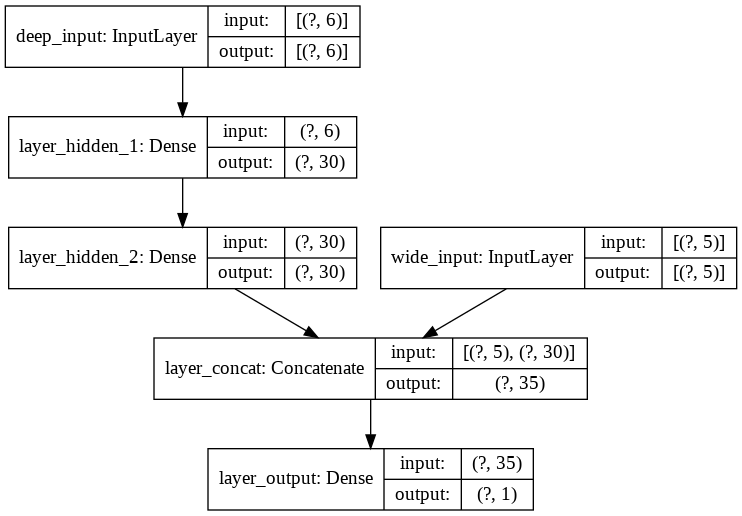

In [9]:
layer_input_wide = keras.layers.Input(shape=[5], name="wide_input")
layer_input_deep = keras.layers.Input(shape=[6], name="deep_input")
layer_hidden_1 = keras.layers.Dense(30, activation='relu', name="layer_hidden_1")(layer_input_deep)
layer_hidden_2 = keras.layers.Dense(30, activation='relu', name="layer_hidden_2")(layer_hidden_1)
layer_concat = keras.layers.concatenate([layer_input_wide, layer_hidden_2], name="layer_concat")
layer_output = keras.layers.Dense(1, name="layer_output")(layer_concat)

model = keras.models.Model(inputs=[layer_input_wide, layer_input_deep], outputs=[layer_output])

keras.utils.plot_model(model, show_shapes=True)

In [10]:
x_train_wide, x_train_deep = x_train[:, :5], x_train[:, 2:]
x_val_wide, x_val_deep = x_val[:, :5], x_val[:, 2:]
x_test_wide, x_test_deep = x_test[:, :5], x_test[:, 2:]
print(f"x_train_wide.shape = {x_train_wide.shape}, x_train_deep.shape = {x_train_deep.shape}")
print(f"x_val_wide.shape = {x_val_wide.shape}, x_val_deep.shape = {x_val_deep.shape}")
print(f"x_test_wide.shape = {x_test_wide.shape}, x_test_deep.shape = {x_test_deep.shape}")

x_train_wide.shape = (11610, 5), x_train_deep.shape = (11610, 6)
x_val_wide.shape = (3870, 5), x_val_deep.shape = (3870, 6)
x_test_wide.shape = (5160, 5), x_test_deep.shape = (5160, 6)


In [11]:
model.compile(optimizer=keras.optimizers.SGD(lr=1e-3), loss='mse')

history = model.fit(
    (x_train_wide, x_train_deep), 
    y_train, 
    epochs=20, 
    validation_data=((x_val_wide, x_val_deep), y_val)
)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.8145 - val_loss: 0.8072
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6771 - val_loss: 0.6658
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5979 - val_loss: 0.5687
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5584 - val_loss: 0.5296
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5334 - val_loss: 0.4993
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5120 - val_loss: 0.4811
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4970 - val_loss: 0.4696
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4843 - val_loss: 0.4496
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4730 - val_loss: 0.4404
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4644 - val_loss: 0.4315

In [12]:
model.predict((x_test_wide[:3], x_test_deep[:3]))

array([[0.30591235],
       [1.9540672 ],
       [3.4426105 ]], dtype=float32)

## Multiple output (auxiliary output for regularization)

In [13]:
utils.reset_session(RANDOM_SEED)

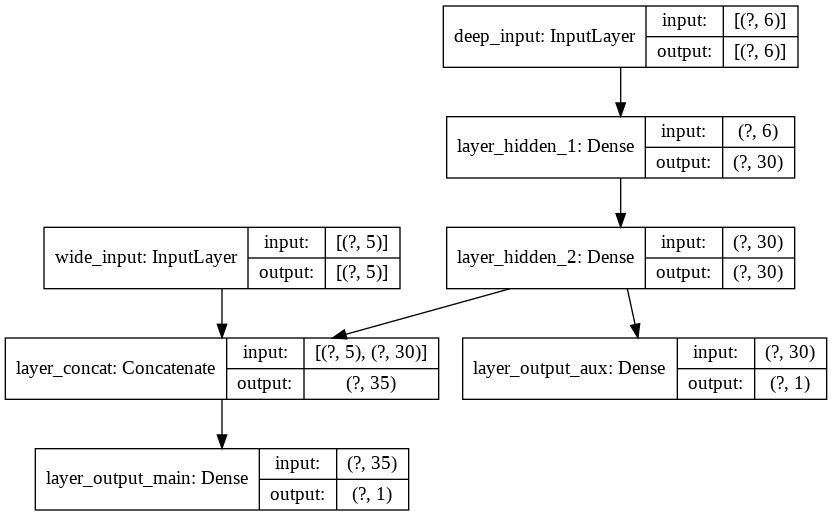

In [14]:
layer_input_wide = keras.layers.Input(shape=[5], name="wide_input")
layer_input_deep = keras.layers.Input(shape=[6], name="deep_input")
layer_hidden_1 = keras.layers.Dense(30, activation='relu', name="layer_hidden_1")(layer_input_deep)
layer_hidden_2 = keras.layers.Dense(30, activation='relu', name="layer_hidden_2")(layer_hidden_1)
layer_concat = keras.layers.concatenate([layer_input_wide, layer_hidden_2], name="layer_concat")
layer_output_main = keras.layers.Dense(1, name="layer_output_main")(layer_concat)
layer_output_aux = keras.layers.Dense(1, name="layer_output_aux")(layer_hidden_2)

model = keras.models.Model(
    inputs=[layer_input_wide, layer_input_deep], 
    outputs=[layer_output_main, layer_output_aux]
)

keras.utils.plot_model(model, show_shapes=True)

In [15]:
model.compile(
    optimizer=keras.optimizers.SGD(lr=1e-3), 
    loss=['mse', 'mse'], 
    loss_weights=[0.9, 0.1]
)

history = model.fit(
    (x_train_wide, x_train_deep), 
    (y_train, y_train), 
    epochs=20, 
    validation_data=((x_val_wide, x_val_deep), (y_val, y_val))
)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.1365 - layer_output_main_loss: 1.9196 - layer_output_aux_loss: 4.0890 - val_loss: 1.6233 - val_layer_output_main_loss: 0.8468 - val_layer_output_aux_loss: 8.6117
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8905 - layer_output_main_loss: 0.6969 - layer_output_aux_loss: 2.6326 - val_loss: 1.5163 - val_layer_output_main_loss: 0.6836 - val_layer_output_aux_loss: 9.0109
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7429 - layer_output_main_loss: 0.6088 - layer_output_aux_loss: 1.9499 - val_loss: 1.4639 - val_layer_output_main_loss: 0.6229 - val_layer_output_aux_loss: 9.0326
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6771 - layer_output_main_loss: 0.5691 - layer_output_aux_loss: 1.6485 - val_loss: 1.3388 - val_layer_output_main_loss: 0.5481 - val_layer_output_aux_loss: 8.4552
Epoch 5/20
363/363 [============================

In [16]:
model.predict((x_test_wide[:3], x_test_deep[:3]))

[array([[0.2676244],
        [1.980763 ],
        [3.3396287]], dtype=float32), array([[0.959365 ],
        [1.9240992],
        [2.515281 ]], dtype=float32)]